In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder

In [65]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [84]:
X = np.array(df.iloc[:,3:5])
print("Shape of X:"+str(X.shape))

Shape of X:(214, 2)


In [85]:
y = np.array(df['Type'])
print("Shape of y:"+str(y.shape))

Shape of y:(214,)


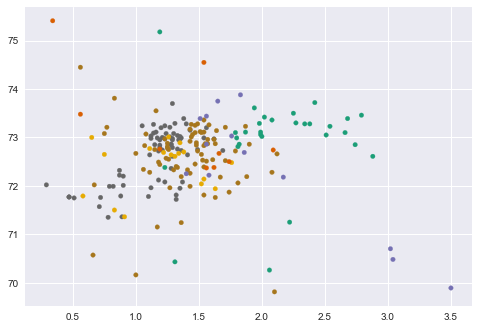

In [86]:
# Create color maps
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.get_cmap('Dark2_r'),s=20,label=y)
plt.show()

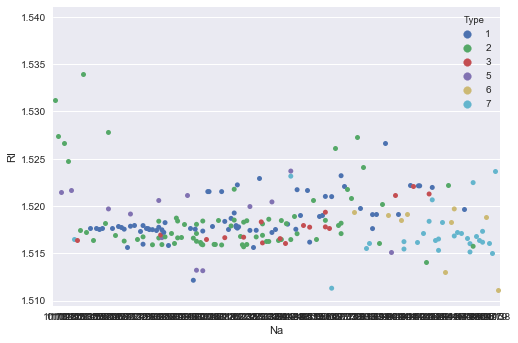

In [87]:
sns.swarmplot(x='Na',y='RI',data=df,hue='Type')
sns.plt.show()

In [88]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(160, 2)
Shape of y_Train:(160,)
Shape of X_Test:(54, 2)
Shape of y_Test:(54,)


In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [91]:
pred = knn.predict(X_train)
pred

array([2, 2, 1, 1, 7, 2, 1, 2, 7, 3, 3, 2, 1, 7, 2, 5, 1, 2, 7, 2, 1, 1, 1,
       1, 6, 2, 2, 1, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 7, 1, 7, 1, 2,
       7, 1, 1, 7, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 2, 1, 1, 7, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 7, 3, 1, 7, 1, 1, 7, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 7, 1, 7, 1, 7, 2, 2, 1, 2, 1, 2, 1, 1, 7, 7, 5, 2,
       2, 5, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 5, 1, 2, 2, 2, 2, 1, 1, 5,
       7, 1, 7, 2, 1, 1, 5, 1, 7, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2])

In [92]:
knn.score(X_train,Y_train)

0.76249999999999996

In [102]:
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#83ff75'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#dcffd8'])

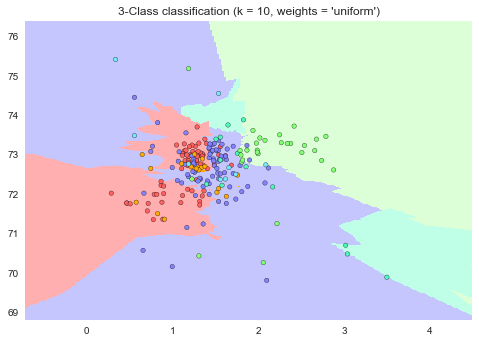

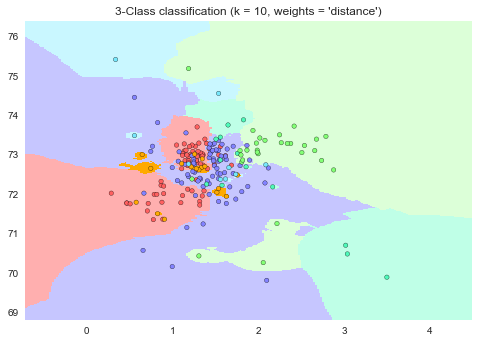

In [103]:
h = .02  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))

plt.show()

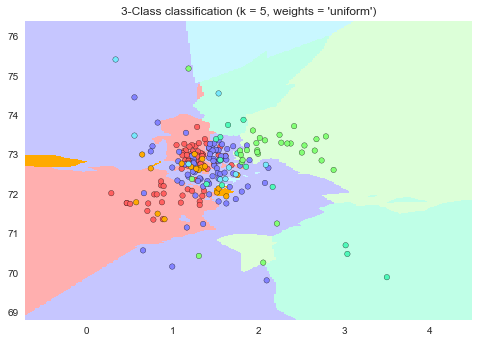

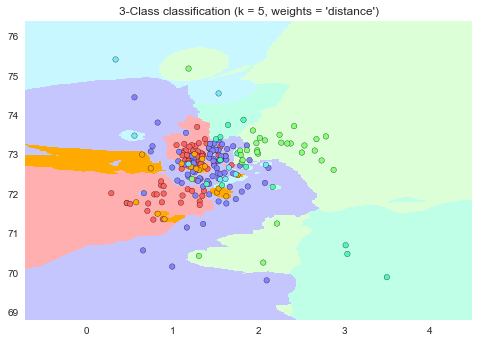

In [106]:
h = .02  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(5, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,edgecolor='k', s=30)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (5, weights))

plt.show()